In [1]:
import pandas as pd

In [326]:
df = pd.read_excel('IBM_Job_satisfaction.xlsm')

In [327]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19478 entries, 0 to 19477
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       19478 non-null  int64 
 1   BusinessTravel            19478 non-null  object
 2   DailyRate                 19478 non-null  int64 
 3   Department                19478 non-null  object
 4   DistanceFromHome          19478 non-null  int64 
 5   Education                 19478 non-null  int64 
 6   EnvironmentSatisfaction   19478 non-null  int64 
 7   Gender                    19478 non-null  object
 8   HourlyRate                19478 non-null  int64 
 9   JobInvolvement            19478 non-null  int64 
 10  JobLevel                  19478 non-null  int64 
 11  JobRole                   19478 non-null  object
 12  JobSatisfaction           19478 non-null  int64 
 13  MaritalStatus             19478 non-null  object
 14  MonthlyIncome         

In [328]:
df = df[['Age', 'Department', 'Education', 'Gender', 'JobLevel', 'MonthlyIncome', 'WorkLifeBalance','JobSatisfaction']]

In [329]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19478 entries, 0 to 19477
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Age              19478 non-null  int64 
 1   Department       19478 non-null  object
 2   Education        19478 non-null  int64 
 3   Gender           19478 non-null  object
 4   JobLevel         19478 non-null  int64 
 5   MonthlyIncome    19478 non-null  int64 
 6   WorkLifeBalance  19478 non-null  int64 
 7   JobSatisfaction  19478 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 1.2+ MB


Non-numerical attrbitues

In [330]:
df['Department'].unique()

array(['Research & Development', 'Human Resources', 'Sales'], dtype=object)

In [331]:
dept_dict = {d:i for i,d in enumerate(df['Department'].unique())}
dept_dict_inv = {i:d for d,i in dept_dict.items()}
dept_dict

{'Research & Development': 0, 'Human Resources': 1, 'Sales': 2}

In [332]:
gender_dict = {g:i for i,g in enumerate(df['Gender'].unique())}
gender_dict_inv = {i:g for g,i in dept_dict.items()}
gender_dict

{'Male': 0, 'Female': 1}

In [333]:
df['Department'] = df['Department'].map(dept_dict)
df['Gender'] = df['Gender'].map(gender_dict)

In [334]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19478 entries, 0 to 19477
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              19478 non-null  int64
 1   Department       19478 non-null  int64
 2   Education        19478 non-null  int64
 3   Gender           19478 non-null  int64
 4   JobLevel         19478 non-null  int64
 5   MonthlyIncome    19478 non-null  int64
 6   WorkLifeBalance  19478 non-null  int64
 7   JobSatisfaction  19478 non-null  int64
dtypes: int64(8)
memory usage: 1.2 MB


In [335]:
df.describe()

,Age,Department,Education,Gender,JobLevel,MonthlyIncome,WorkLifeBalance,JobSatisfaction
count,19478.000000,19478.000000,19478.000000,19478.000000,19478.000000,19478.000000,19478.000000,19478.000000
mean,37.524489,0.617569,2.924274,0.402146,2.104990,6665.078961,2.769689,2.752849
std,8.860420,0.901080,1.026008,0.490344,1.115506,4781.062495,0.700480,1.097875
min,18.000000,0.000000,1.000000,0.000000,1.000000,1009.000000,1.000000,1.000000
25%,31.000000,0.000000,2.000000,0.000000,1.000000,3038.000000,2.000000,2.000000
50%,36.000000,0.000000,3.000000,0.000000,2.000000,5042.000000,3.000000,3.000000
75%,43.000000,2.000000,4.000000,1.000000,3.000000,8620.000000,3.000000,4.000000
max,60.000000,2.000000,5.000000,1.000000,5.000000,19999.000000,4.000000,4.000000


<AxesSubplot:>

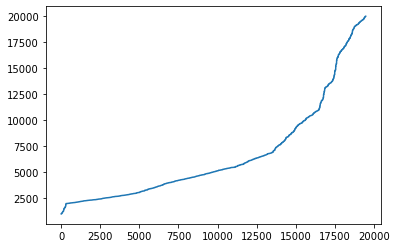

In [336]:
df['MonthlyIncome'].sort_values().plot(use_index=False)

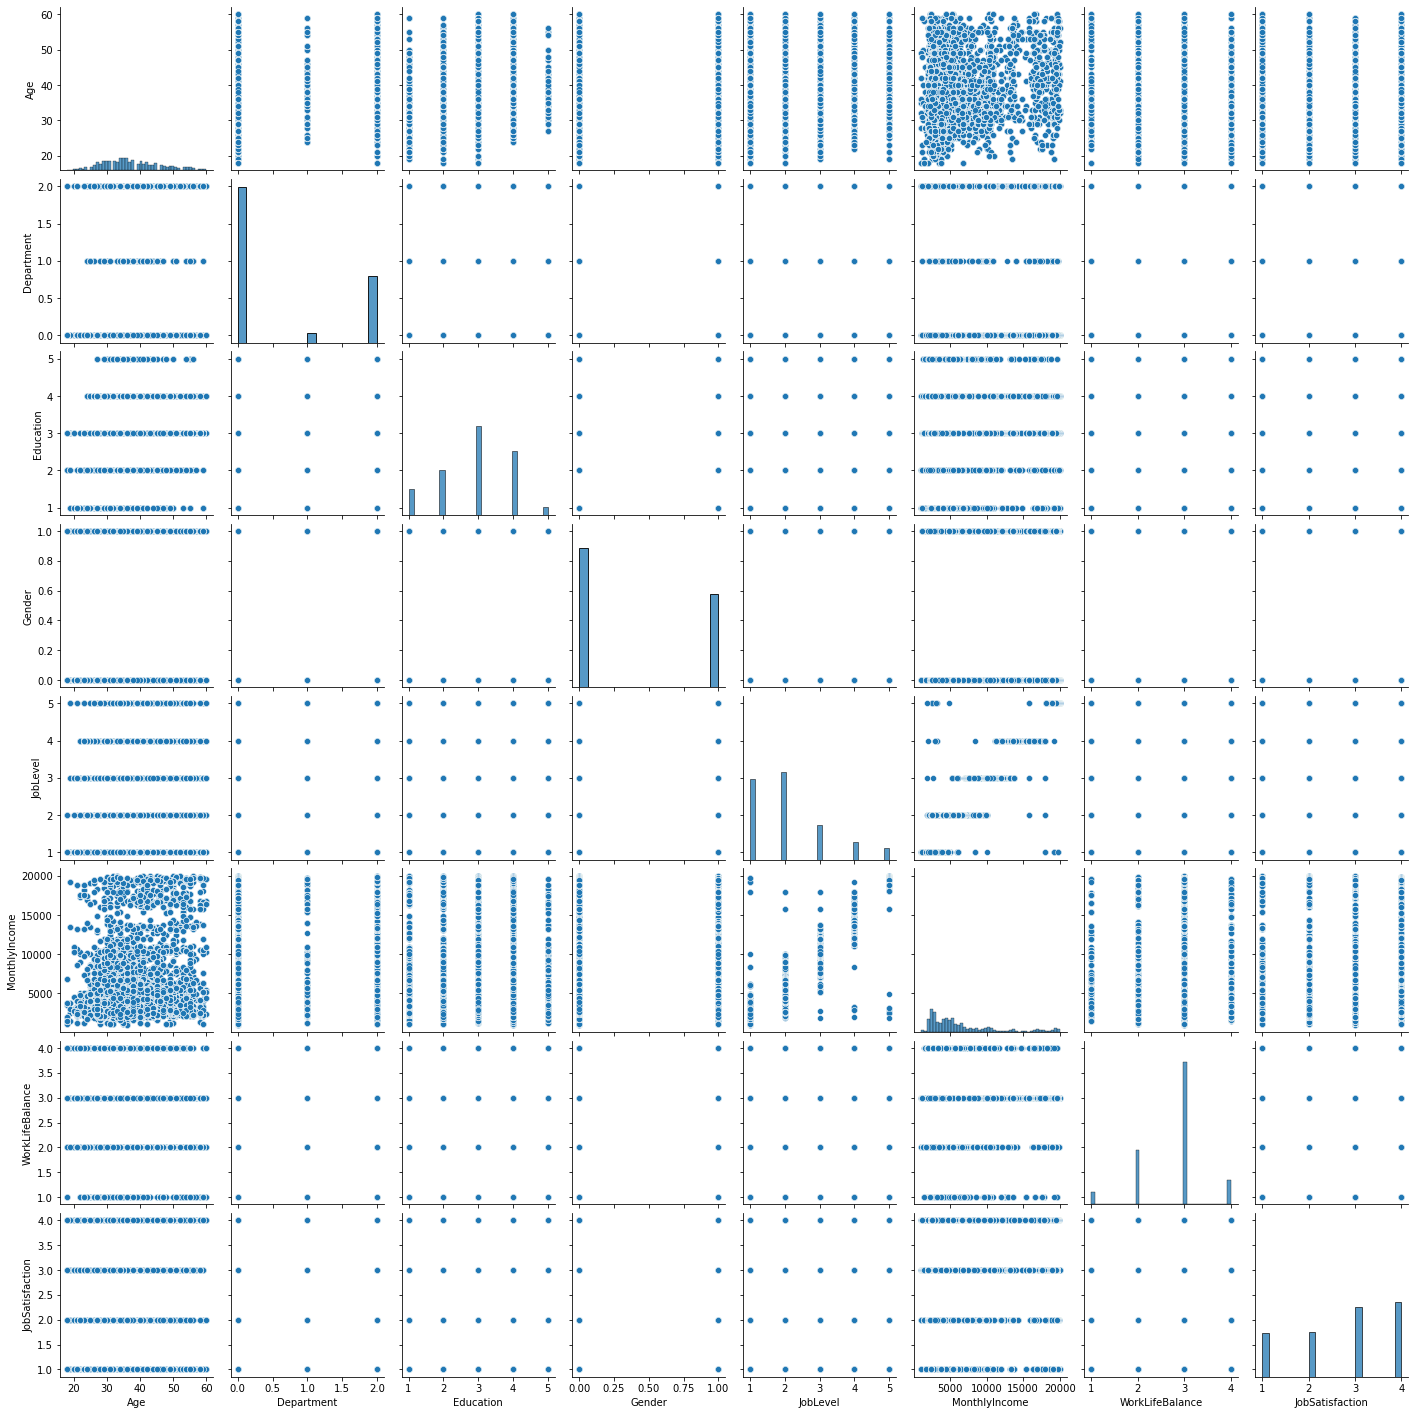

In [337]:
import seaborn as sns
sns.pairplot(df)

<AxesSubplot:>

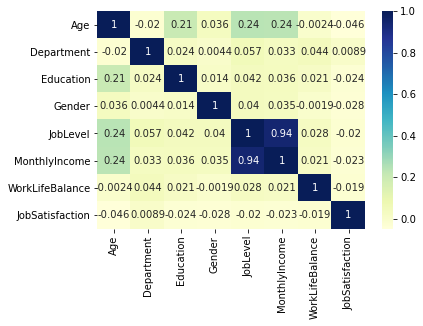

In [338]:
corr = df[df.columns].corr()
sns.heatmap(corr, cmap="YlGnBu", annot=True)

<AxesSubplot:xlabel='Gender', ylabel='JobLevel'>

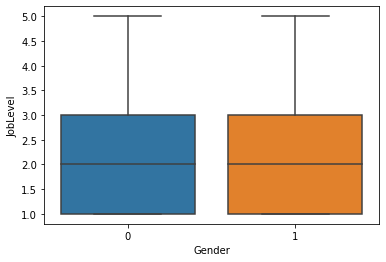

In [339]:
sns.boxplot(x='Gender', y='JobLevel', data = df)

Discretization

In [340]:
df['Age'].min(), df['Age'].max()

(18, 60)

In [341]:
def f(age):
    if age<=32:
        return '18-32'
    elif age>32 and age<=46:
        return '32-46'
    elif age>=46:
        return '46-60'
    
df['Age'] = df['Age'].map(f)

In [342]:
df['Age']

0        46-60
1        46-60
2        46-60
3        46-60
4        46-60
         ...  
19473    46-60
19474    32-46
19475    32-46
19476    46-60
19477    18-32
Name: Age, Length: 19478, dtype: object

In [343]:
age_dict = {a:i for i,a in enumerate(sorted(df['Age'].unique()))}
age_dict_inv = {i:a for a,i in age_dict.items()}
age_dict

{'18-32': 0, '32-46': 1, '46-60': 2}

In [344]:
df['Age'] = df['Age'].map(age_dict)

In [345]:
df['MonthlyIncome'].min(), df['MonthlyIncome'].max()

(1009, 19999)

In [346]:
def f(income):
    if income<=7336:
        return '1009-7336'
    elif income>7336 and income<=13669:
        return '7336-13669'
    elif income>=13669:
        return '13669-19999'
    
df['MonthlyIncome'] = df['MonthlyIncome'].map(f)

In [347]:
df['MonthlyIncome']

0         1009-7336
1         1009-7336
2         1009-7336
3         1009-7336
4         1009-7336
            ...    
19473     1009-7336
19474     1009-7336
19475     1009-7336
19476    7336-13669
19477     1009-7336
Name: MonthlyIncome, Length: 19478, dtype: object

In [348]:
income_dict = {inc:i for i,inc in enumerate(sorted(df['MonthlyIncome'].unique(), key=lambda inc: int(inc.split('-')[0])))}
income_dict_inv = {inc:a for a,inc in income_dict.items()}
income_dict

{'1009-7336': 0, '7336-13669': 1, '13669-19999': 2}

In [349]:
df['MonthlyIncome'] = df['MonthlyIncome'].map(income_dict)

In [350]:
df.describe()

,Age,Department,Education,Gender,JobLevel,MonthlyIncome,WorkLifeBalance,JobSatisfaction
count,19478.000000,19478.000000,19478.000000,19478.000000,19478.000000,19478.000000,19478.000000,19478.000000
mean,0.854246,0.617569,2.924274,0.402146,2.104990,0.408358,2.769689,2.752849
std,0.680115,0.901080,1.026008,0.490344,1.115506,0.683305,0.700480,1.097875
min,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
25%,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000,2.000000,2.000000
50%,1.000000,0.000000,3.000000,0.000000,2.000000,0.000000,3.000000,3.000000
75%,1.000000,2.000000,4.000000,1.000000,3.000000,1.000000,3.000000,4.000000
max,2.000000,2.000000,5.000000,1.000000,5.000000,2.000000,4.000000,4.000000


Further discretization

In [351]:
def f(e):
    if e>=1 and e<=2:
        return 0
    elif e>=3 and e<=4:
        return 1
    else: 
        return 2

df['Education'] = df['Education'].map(f)

In [352]:
def f(e):
    if e>=1 and e<=2:
        return 0
    elif e>=3 and e<=4:
        return 1
    else: 
        return 2

df['JobLevel'] = df['JobLevel'].map(f)

In [353]:
def f(e):
    if e>=1 and e<=2:
        return 0
    elif e>=3 and e<=4:
        return 1

df['WorkLifeBalance'] = df['WorkLifeBalance'].map(f)

In [354]:
def f(e):
    if e>=1 and e<=2:
        return 0
    elif e>=3 and e<=4:
        return 1

df['JobSatisfaction'] = df['JobSatisfaction'].map(f)

In [355]:
df.describe()

,Age,Department,Education,Gender,JobLevel,MonthlyIncome,WorkLifeBalance,JobSatisfaction
count,19478.000000,19478.000000,19478.000000,19478.000000,19478.000000,19478.000000,19478.000000,19478.000000
mean,0.854246,0.617569,0.727847,0.402146,0.326317,0.408358,0.716295,0.620700
std,0.680115,0.901080,0.517016,0.490344,0.567104,0.683305,0.450807,0.485225
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000


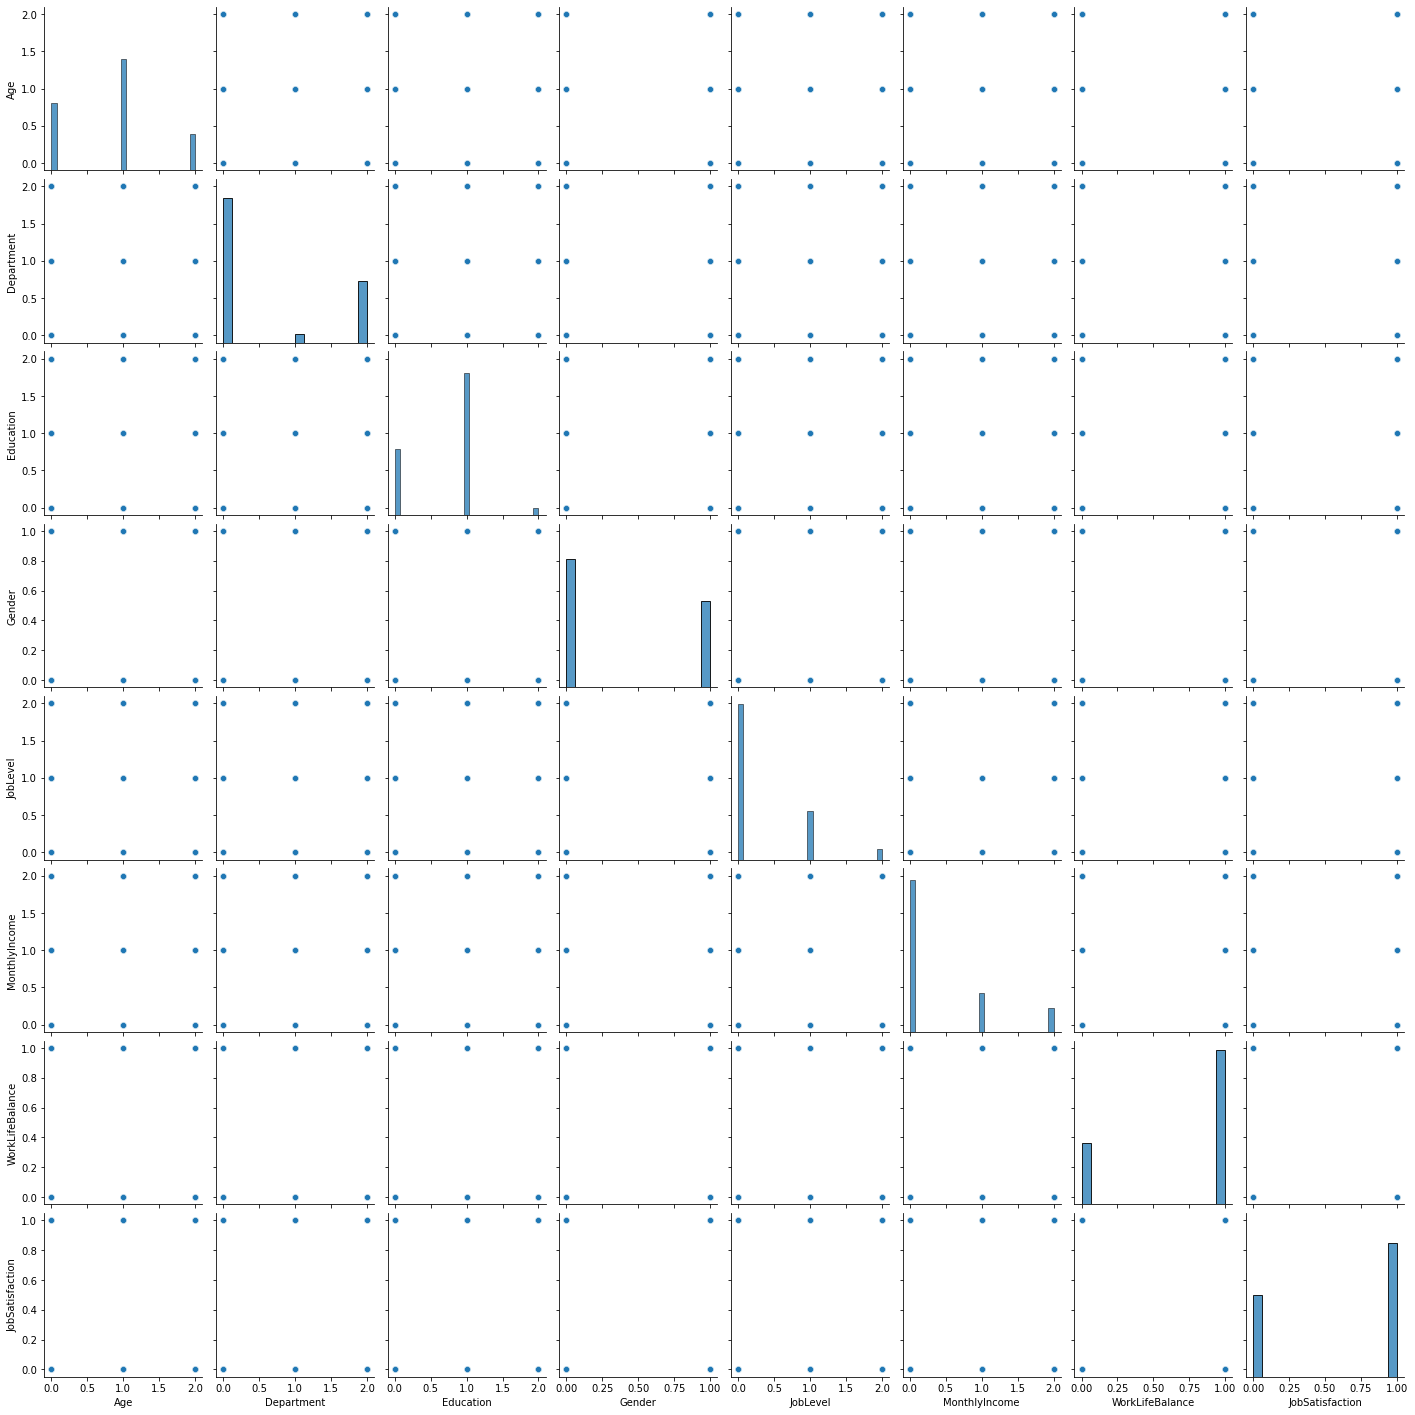

In [356]:
import seaborn as sns
sns.pairplot(df)

<AxesSubplot:>

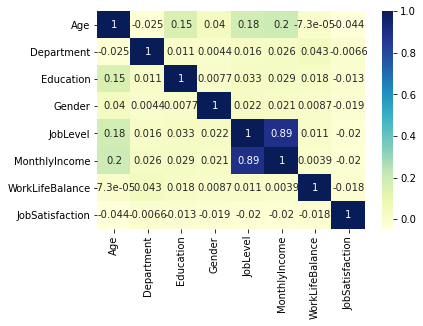

In [357]:
corr = df[df.columns].corr()
sns.heatmap(corr, cmap="YlGnBu", annot=True)

<AxesSubplot:xlabel='JobLevel', ylabel='MonthlyIncome'>

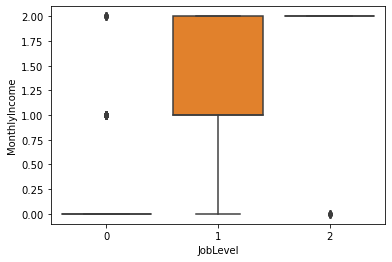

In [358]:
sns.boxplot(x='JobLevel', y='MonthlyIncome', data = df)

In [236]:
import numpy as np

def compute_cpd(data, variable, evidences=None):
    variable_support = sorted(data[variable].unique())
    m = len(variable_support)
    #print(m)
    
    if evidences is None:
        n = 1
        rows_constraints = [[]]
    else:
        rows_constraints = list(itertools.product(*[sorted(data[evidence].unique()) for evidence in evidences]))
        n = len(rows_constraints)
        #print(rows_constraints)
                
    cpd = pd.DataFrame(np.zeros((n,m)), columns=variable_support)
    #print(cpd)
    
    index = []
                
    for row,row_constraints in enumerate(rows_constraints):
        #print(f'Row {row}')
        data_supp = data.copy()
        idx = ''
        for i,constr in enumerate(row_constraints):
            evidence = evidences[i]
            #print(f'\t{evidence}=={constr}')
            idx += f' {evidence}=={constr} '
            data_supp = data_supp[data_supp[evidence]==constr]
        #print(data_supp[variable].count() )
        new_row = [data_supp[variable][data_supp[variable]==variable_value].count()/data_supp[variable].count() 
                   for variable_value in variable_support]
        #print(len(new_row))
        #print(new_row)
        cpd.iloc[row,:] = new_row 
        index.append(idx)
        
    values = {evidence:cpd[variable_value].mean() for variable_value in variable_support}
    cpd = cpd.fillna(values)
        
    cpd['Evidences'] = index
    cpd = cpd.set_index('Evidences')
    
    cpd.columns.name = variable
        
    return cpd

In [192]:
compute_cpd(data=df, variable='Age')

3
Row 0
19478
[0.3147653763220043, 0.5162234315638156, 0.16901119211418011]


Age,0,1,2
Evidences,,,
,0.314765,0.516223,0.169011


In [193]:
(df['Age']==0).sum()/df.shape[0]

0.3147653763220043

In [194]:
(df['Age']==1).sum()/df.shape[0]

0.5162234315638156

In [195]:
(df['Age']==2).sum()/df.shape[0]

0.16901119211418011

In [196]:
compute_cpd(data=df, variable='JobLevel', evidences=['Age','Education'])

3
[(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
Row 0
	Age==0
	Education==0
2501
[0.8096761295481807, 0.16473410635745703, 0.025589764094362255]
Row 1
	Age==0
	Education==1
3534
[0.8174872665534805, 0.14968873797396717, 0.032823995472552346]
Row 2
	Age==0
	Education==2
96
[0.9166666666666666, 0.08333333333333333, 0.0]
Row 3
	Age==1
	Education==0
2743
[0.7291286912139993, 0.20707254830477578, 0.06379876048122493]
Row 4
	Age==1
	Education==1
6890
[0.7197387518142235, 0.2386066763425254, 0.04165457184325109]
Row 5
	Age==1
	Education==2
422
[0.6492890995260664, 0.33175355450236965, 0.018957345971563982]
Row 6
	Age==2
	Education==0
731
[0.6073871409028728, 0.307797537619699, 0.08481532147742818]
Row 7
	Age==2
	Education==1
2405
[0.5667359667359667, 0.3234927234927235, 0.10977130977130978]
Row 8
	Age==2
	Education==2
156
[0.4551282051282051, 0.44871794871794873, 0.09615384615384616]


JobLevel,0,1,2
Evidences,,,
Age==0 Education==0,0.809676,0.164734,0.025590
Age==0 Education==1,0.817487,0.149689,0.032824
Age==0 Education==2,0.916667,0.083333,0.000000
Age==1 Education==0,0.729129,0.207073,0.063799
Age==1 Education==1,0.719739,0.238607,0.041655
Age==1 Education==2,0.649289,0.331754,0.018957
Age==2 Education==0,0.607387,0.307798,0.084815
Age==2 Education==1,0.566736,0.323493,0.109771
Age==2 Education==2,0.455128,0.448718,0.096154


In [197]:
df['Age'].unique(), df['Education'].unique()

(array([2, 1, 0], dtype=int64), array([0, 1, 2], dtype=int64))

In [199]:
(df['Age'][df['Age']==0][df['Education']==0][df['JobLevel']==0].count())/(df['Age'][df['Age']==0][df['Education']==0].count())

0.8096761295481807

In [200]:
(df['Age'][df['Age']==0][df['Education']==0][df['JobLevel']==1].count())/(df['Age'][df['Age']==0][df['Education']==0].count())

0.16473410635745703

In [201]:
(df['Age'][df['Age']==0][df['Education']==0][df['JobLevel']==2].count())/(df['Age'][df['Age']==0][df['Education']==0].count())

0.025589764094362255

In [202]:
(df['Age'][df['Age']==0][df['Education']==2][df['JobLevel']==0].count())/(df['Age'][df['Age']==0][df['Education']==2].count())

0.9166666666666666

In [204]:
(df['Age'][df['Age']==0][df['Education']==1][df['JobLevel']==0].count())/(df['Age'][df['Age']==0][df['Education']==1].count())

0.8174872665534805

In [203]:
(df['Age'][df['Age']==0][df['Education']==2][df['JobLevel']==2].count())/(df['Age'][df['Age']==0][df['Education']==2].count())

0.0

In [205]:
(df['Age'][df['Age']==2][df['Education']==2][df['JobLevel']==2].count())/(df['Age'][df['Age']==2][df['Education']==2].count())

0.09615384615384616

In [105]:
import itertools
list(itertools.product([1,2,3],[3,4,5],['a','b']))

[(1, 3, 'a'),
 (1, 3, 'b'),
 (1, 4, 'a'),
 (1, 4, 'b'),
 (1, 5, 'a'),
 (1, 5, 'b'),
 (2, 3, 'a'),
 (2, 3, 'b'),
 (2, 4, 'a'),
 (2, 4, 'b'),
 (2, 5, 'a'),
 (2, 5, 'b'),
 (3, 3, 'a'),
 (3, 3, 'b'),
 (3, 4, 'a'),
 (3, 4, 'b'),
 (3, 5, 'a'),
 (3, 5, 'b')]

In [143]:
def f(e):
    if e>=1 and e<=2:
        return 0
    elif e>=3 and e<=4:
        return 1
    else: 
        return 2

df_t = df.copy()

df_t['Education'] = df['Education'].map(f)

In [144]:
df_t['JobLevel'] = df['JobLevel'].map(f)

In [153]:
compute_cpd(data=df_t, variable='JobLevel', evidences=['Age','Education'])

3
[(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2), (3, 0), (3, 1), (3, 2)]
Row 0
	Age==0
	Education==0
2007
[0.8086696562032885, 0.16741405082212257, 0.02391629297458894]
Row 1
	Age==0
	Education==1
2490
[0.8485943775100402, 0.12008032128514057, 0.03132530120481928]
Row 2
	Age==0
	Education==2
48
[1.0, 0.0, 0.0]
Row 3
	Age==1
	Education==0
2357
[0.7878659312685617, 0.171828595672465, 0.04030547305897327]
Row 4
	Age==1
	Education==1
5757
[0.7476116032655897, 0.22546465172833072, 0.026923745006079556]
Row 5
	Age==1
	Education==2
312
[0.5993589743589743, 0.375, 0.02564102564102564]
Row 6
	Age==2
	Education==0
1195
[0.6133891213389121, 0.27364016736401675, 0.11297071129707113]
Row 7
	Age==2
	Education==1
3112
[0.653598971722365, 0.25931876606683807, 0.08708226221079692]
Row 8
	Age==2
	Education==2
252
[0.6904761904761905, 0.2777777777777778, 0.031746031746031744]
Row 9
	Age==3
	Education==0
416
[0.6153846153846154, 0.3293269230769231, 0.055288461538461536]
Row 10
	A

JobLevel,0,1,2
Evidences,,,
Age==0 Education==0,0.808670,0.167414,0.023916
Age==0 Education==1,0.848594,0.120080,0.031325
Age==0 Education==2,1.000000,0.000000,0.000000
Age==1 Education==0,0.787866,0.171829,0.040305
Age==1 Education==1,0.747612,0.225465,0.026924
Age==1 Education==2,0.599359,0.375000,0.025641
Age==2 Education==0,0.613389,0.273640,0.112971
Age==2 Education==1,0.653599,0.259319,0.087082
Age==2 Education==2,0.690476,0.277778,0.031746


In [158]:
def f(e):
    if e>=0 and e<=1:
        return 0
    elif e>=2 and e<3:
        return 1
    else: 
        return 2

df_t['Age'] = df['Age'].map(f)

In [159]:
compute_cpd(data=df_t, variable='JobLevel', evidences=['Age','Education'])

3
[(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
Row 0
	Age==0
	Education==0
4364
[0.7974335472043996, 0.16979835013748854, 0.03276810265811182]
Row 1
	Age==0
	Education==1
8247
[0.7781011276827937, 0.19364617436643627, 0.028252697950769977]
Row 2
	Age==0
	Education==2
360
[0.6527777777777778, 0.325, 0.022222222222222223]
Row 3
	Age==1
	Education==0
1195
[0.6133891213389121, 0.27364016736401675, 0.11297071129707113]
Row 4
	Age==1
	Education==1
3112
[0.653598971722365, 0.25931876606683807, 0.08708226221079692]
Row 5
	Age==1
	Education==2
252
[0.6904761904761905, 0.2777777777777778, 0.031746031746031744]
Row 6
	Age==2
	Education==0
416
[0.6153846153846154, 0.3293269230769231, 0.055288461538461536]
Row 7
	Age==2
	Education==1
1470
[0.5170068027210885, 0.37210884353741497, 0.1108843537414966]
Row 8
	Age==2
	Education==2
62
[0.3870967741935484, 0.5, 0.11290322580645161]


JobLevel,0,1,2
Evidences,,,
Age==0 Education==0,0.797434,0.169798,0.032768
Age==0 Education==1,0.778101,0.193646,0.028253
Age==0 Education==2,0.652778,0.325000,0.022222
Age==1 Education==0,0.613389,0.273640,0.112971
Age==1 Education==1,0.653599,0.259319,0.087082
Age==1 Education==2,0.690476,0.277778,0.031746
Age==2 Education==0,0.615385,0.329327,0.055288
Age==2 Education==1,0.517007,0.372109,0.110884
Age==2 Education==2,0.387097,0.500000,0.112903


In [160]:
df.describe()

,Age,Department,Education,Gender,JobLevel,MonthlyIncome,WorkLifeBalance,JobSatisfaction
count,19478.000000,19478.000000,19478.000000,19478.000000,19478.000000,19478.000000,19478.000000,19478.000000
mean,1.200739,0.617569,2.924274,0.402146,2.104990,0.802495,2.769689,2.752849
std,0.909498,0.901080,1.026008,0.490344,1.115506,0.974312,0.700480,1.097875
min,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
25%,1.000000,0.000000,2.000000,0.000000,1.000000,0.000000,2.000000,2.000000
50%,1.000000,0.000000,3.000000,0.000000,2.000000,1.000000,3.000000,3.000000
75%,2.000000,2.000000,4.000000,1.000000,3.000000,1.000000,3.000000,4.000000
max,3.000000,2.000000,5.000000,1.000000,5.000000,3.000000,4.000000,4.000000


In [210]:
compute_cpd(data=df_t, variable='JobLevel', evidences=['Age','Education'])

JobLevel,0,1,2
Evidences,,,
Age==0 Education==0,0.797434,0.169798,0.032768
Age==0 Education==1,0.778101,0.193646,0.028253
Age==0 Education==2,0.652778,0.325000,0.022222
Age==1 Education==0,0.613389,0.273640,0.112971
Age==1 Education==1,0.653599,0.259319,0.087082
Age==1 Education==2,0.690476,0.277778,0.031746
Age==2 Education==0,0.615385,0.329327,0.055288
Age==2 Education==1,0.517007,0.372109,0.110884
Age==2 Education==2,0.387097,0.500000,0.112903


In [212]:
compute_cpd(data=df_t, variable='JobLevel', evidences=['Age','Education']).values.T

array([[0.79743355, 0.77810113, 0.65277778, 0.61338912, 0.65359897,
        0.69047619, 0.61538462, 0.5170068 , 0.38709677],
       [0.16979835, 0.19364617, 0.325     , 0.27364017, 0.25931877,
        0.27777778, 0.32932692, 0.37210884, 0.5       ],
       [0.0327681 , 0.0282527 , 0.02222222, 0.11297071, 0.08708226,
        0.03174603, 0.05528846, 0.11088435, 0.11290323]])

In [223]:
compute_cpd(data=df, variable='JobLevel', evidences=['Age','Education','Gender'])

JobLevel,0,1,2
Evidences,,,
Age==0 Education==0 Gender==0,0.820203,0.159466,0.020330
Age==0 Education==0 Gender==1,0.791802,0.173679,0.034520
Age==0 Education==1 Gender==0,0.838340,0.117310,0.044349
Age==0 Education==1 Gender==1,0.787056,0.196938,0.016006
Age==0 Education==2 Gender==0,1.000000,0.000000,0.000000
Age==0 Education==2 Gender==1,0.666667,0.333333,0.000000
Age==1 Education==0 Gender==0,0.712304,0.211098,0.076598
Age==1 Education==0 Gender==1,0.754839,0.200922,0.044240
Age==1 Education==1 Gender==0,0.738534,0.219622,0.041844


In [222]:
df['Age'][df['Age']==0][df['Education']==0][df['Gender']==0][df['JobLevel']==2].count()/df['Age'][df['Age']==0][df['Education']==0][df['Gender']==0].count()

0.020330368487928845

In [224]:
compute_cpd(data=df, variable='JobLevel', evidences=['Age','Education','Gender']).iloc[0].sum()

0.9999999999999999

In [226]:
compute_cpd(data=df, variable='MonthlyIncome', evidences=['JobLevel','Department'])

MonthlyIncome,0,1,2
Evidences,,,
JobLevel==0 Department==0,0.968955,0.030211,0.000833
JobLevel==0 Department==1,0.967797,0.030508,0.001695
JobLevel==0 Department==2,0.934760,0.064475,0.000765
JobLevel==1 Department==0,0.042878,0.663154,0.293968
JobLevel==1 Department==1,0.000000,0.559441,0.440559
JobLevel==1 Department==2,0.034483,0.743746,0.221771
JobLevel==2 Department==0,0.008511,0.000000,0.991489
JobLevel==2 Department==1,0.024390,0.000000,0.975610
JobLevel==2 Department==2,0.004902,0.000000,0.995098


In [359]:
compute_cpd(data=df, variable='WorkLifeBalance', evidences=['JobLevel','Department'])

{0: 0.24622525663577408, 1: 0.7537747433642259}


WorkLifeBalance,0,1
Evidences,,
JobLevel==0 Department==0,0.300865,0.699135
JobLevel==0 Department==1,0.311864,0.688136
JobLevel==0 Department==2,0.245158,0.754842
JobLevel==1 Department==0,0.284884,0.715116
JobLevel==1 Department==1,0.111888,0.888112
JobLevel==1 Department==2,0.293442,0.706558
JobLevel==2 Department==0,0.296454,0.703546
JobLevel==2 Department==1,0.219512,0.780488
JobLevel==2 Department==2,0.151961,0.848039


In [247]:
import numpy as np

def compute_cpd(data, variable, evidences=None):
    variable_support = sorted(data[variable].unique())
    m = len(variable_support)
    #print(m)
    
    if evidences is None:
        n = 1
        rows_constraints = [[]]
    else:
        rows_constraints = list(itertools.product(*[sorted(data[evidence].unique()) for evidence in evidences]))
        n = len(rows_constraints)
        #print(rows_constraints)
                
    cpd = pd.DataFrame(np.zeros((n,m)), columns=variable_support)
    #print(cpd)
    
    index = []
                
    for row,row_constraints in enumerate(rows_constraints):
        #print(f'Row {row}')
        data_supp = data.copy()
        idx = ''
        for i,constr in enumerate(row_constraints):
            evidence = evidences[i]
            #print(f'\t{evidence}=={constr}')
            idx += f' {evidence}=={constr} '
            data_supp = data_supp[data_supp[evidence]==constr]
        #print(data_supp[variable].count() )
        new_row = [data_supp[variable][data_supp[variable]==variable_value].count()/data_supp[variable].count() 
                   for variable_value in variable_support]
        #print(len(new_row))
        #print(new_row)
        cpd.iloc[row,:] = new_row 
        index.append(idx)
        
    values = {variable_value:cpd.fillna(0.0)[variable_value].mean() for variable_value in variable_support[:-1]}
    values[variable_support[-1]] = 1-sum([fill for v,fill in values.items()])
    print(values)
    cpd = cpd.fillna(values)
        
    cpd['Evidences'] = index
    cpd = cpd.set_index('Evidences')
    
    cpd.columns.name = variable
        
    return cpd

In [248]:
cpd = compute_cpd(data=df, variable='JobSatisfaction', evidences=['JobLevel', 'MonthlyIncome'])
cpd

{0: 0.3486494486775365, 1: 0.32157858939313094, 2: 0.32977196192933256}


<ipython-input-247-745742b61e16>:31: RuntimeWarning: invalid value encountered in long_scalars
  new_row = [data_supp[variable][data_supp[variable]==variable_value].count()/data_supp[variable].count()
<ipython-input-247-745742b61e16>:31: RuntimeWarning: invalid value encountered in long_scalars
  new_row = [data_supp[variable][data_supp[variable]==variable_value].count()/data_supp[variable].count()
<ipython-input-247-745742b61e16>:31: RuntimeWarning: invalid value encountered in long_scalars
  new_row = [data_supp[variable][data_supp[variable]==variable_value].count()/data_supp[variable].count()


JobSatisfaction,0,1,2
Evidences,,,
JobLevel==0 MonthlyIncome==0,0.370679,0.303397,0.325923
JobLevel==0 MonthlyIncome==1,0.399287,0.194296,0.406417
JobLevel==0 MonthlyIncome==2,0.583333,0.333333,0.083333
JobLevel==1 MonthlyIncome==0,0.384615,0.366864,0.248521
JobLevel==1 MonthlyIncome==1,0.410649,0.291847,0.297504
JobLevel==1 MonthlyIncome==2,0.384167,0.264167,0.351667
JobLevel==2 MonthlyIncome==0,0.222222,0.777778,0.000000
JobLevel==2 MonthlyIncome==1,0.348649,0.321579,0.329772
JobLevel==2 MonthlyIncome==2,0.382892,0.362525,0.254582


In [251]:
for row in range(cpd.shape[0]):
    print(cpd.iloc[row].sum())

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


In [253]:
cpd = compute_cpd(data=df, variable='JobSatisfaction', evidences=['JobLevel', 'MonthlyIncome','WorkLifeBalance'])
cpd

{0: 0.33139970614464886, 1: 0.28667332588550115, 2: 0.38192696796985004}


<ipython-input-247-745742b61e16>:31: RuntimeWarning: invalid value encountered in long_scalars
  new_row = [data_supp[variable][data_supp[variable]==variable_value].count()/data_supp[variable].count()
<ipython-input-247-745742b61e16>:31: RuntimeWarning: invalid value encountered in long_scalars
  new_row = [data_supp[variable][data_supp[variable]==variable_value].count()/data_supp[variable].count()
<ipython-input-247-745742b61e16>:31: RuntimeWarning: invalid value encountered in long_scalars
  new_row = [data_supp[variable][data_supp[variable]==variable_value].count()/data_supp[variable].count()
<ipython-input-247-745742b61e16>:31: RuntimeWarning: invalid value encountered in long_scalars
  new_row = [data_supp[variable][data_supp[variable]==variable_value].count()/data_supp[variable].count()
<ipython-input-247-745742b61e16>:31: RuntimeWarning: invalid value encountered in long_scalars
  new_row = [data_supp[variable][data_supp[variable]==variable_value].count()/data_supp[variable].cou

JobSatisfaction,0,1,2
Evidences,,,
JobLevel==0 MonthlyIncome==0 WorkLifeBalance==0,0.364984,0.295005,0.340010
JobLevel==0 MonthlyIncome==0 WorkLifeBalance==1,0.368421,0.308804,0.322775
JobLevel==0 MonthlyIncome==0 WorkLifeBalance==2,0.399856,0.294329,0.305815
JobLevel==0 MonthlyIncome==1 WorkLifeBalance==0,0.168421,0.178947,0.652632
JobLevel==0 MonthlyIncome==1 WorkLifeBalance==1,0.558140,0.249169,0.192691
JobLevel==0 MonthlyIncome==1 WorkLifeBalance==2,0.342857,0.000000,0.657143
JobLevel==0 MonthlyIncome==2 WorkLifeBalance==0,0.331400,0.286673,0.381927
JobLevel==0 MonthlyIncome==2 WorkLifeBalance==1,0.545455,0.363636,0.090909
JobLevel==0 MonthlyIncome==2 WorkLifeBalance==2,1.000000,0.000000,0.000000


In [254]:
for row in range(cpd.shape[0]):
    print(cpd.iloc[row].sum())

1.0
0.9999999999999999
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


In [256]:
!pip install pgmpy

     ---------------------------------------- 1.9/1.9 MB 3.2 MB/s eta 0:00:00
     -------------------------------------- 161.9/161.9 MB 2.8 MB/s eta 0:00:00


You should consider upgrading via the 'c:\users\pitti\anaconda3\python.exe -m pip install --upgrade pip' command.


In [360]:
from pgmpy.models import BayesianNetwork

job_satisfaction_model = BayesianNetwork(
    [
        ('Age', 'JobLevel'),
        ('Education', 'JobLevel'),
        ('Gender', 'JobLevel'),
        ('Department', 'MonthlyIncome'),
        ('JobLevel', 'MonthlyIncome'),
        ('Department', 'WorkLifeBalance'),
        ('JobLevel', 'WorkLifeBalance'),
        ('JobLevel', 'JobSatisfaction'),
        ('MonthlyIncome', 'JobSatisfaction'),
        ('WorkLifeBalance', 'JobSatisfaction'),
    ]
)

In [363]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19478 entries, 0 to 19477
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              19478 non-null  int64
 1   Department       19478 non-null  int64
 2   Education        19478 non-null  int64
 3   Gender           19478 non-null  int64
 4   JobLevel         19478 non-null  int64
 5   MonthlyIncome    19478 non-null  int64
 6   WorkLifeBalance  19478 non-null  int64
 7   JobSatisfaction  19478 non-null  int64
dtypes: int64(8)
memory usage: 1.2 MB


In [368]:
from pgmpy.estimators import BayesianEstimator

In [369]:
job_satisfaction_model.fit(data=df, estimator=BayesianEstimator)

In [370]:
print(str(job_satisfaction_model.get_cpds('JobLevel')))

+-------------+----------------------+-----+---------------------+-----------------------+
| Age         | Age(0)               | ... | Age(2)              | Age(2)                |
+-------------+----------------------+-----+---------------------+-----------------------+
| Education   | Education(0)         | ... | Education(2)        | Education(2)          |
+-------------+----------------------+-----+---------------------+-----------------------+
| Gender      | Gender(0)            | ... | Gender(0)           | Gender(1)             |
+-------------+----------------------+-----+---------------------+-----------------------+
| JobLevel(0) | 0.8201173965722083   | ... | 0.4994232987312572  | 0.407623209516873     |
+-------------+----------------------+-----+---------------------+-----------------------+
| JobLevel(1) | 0.15949700626977684  | ... | 0.3125720876585928  | 0.5911629036173829    |
+-------------+----------------------+-----+---------------------+-----------------------+

In [371]:
cpd = job_satisfaction_model.get_cpds('JobLevel')

In [372]:
cpd.get_values().T

array([[8.20117397e-01, 1.59497006e-01, 2.03855972e-02],
       [7.91664170e-01, 1.73726360e-01, 3.46094702e-02],
       [8.38273600e-01, 1.17339055e-01, 4.43873451e-02],
       [7.86968678e-01, 1.96964426e-01, 1.60668960e-02],
       [9.97437868e-01, 1.28106585e-03, 1.28106585e-03],
       [6.62852784e-01, 3.33333333e-01, 3.81388253e-03],
       [7.12240499e-01, 2.11118184e-01, 7.66413169e-02],
       [7.54730825e-01, 2.00955550e-01, 4.43136251e-02],
       [7.38507672e-01, 2.19629216e-01, 4.18631120e-02],
       [6.89812398e-01, 2.68803731e-01, 4.13838711e-02],
       [6.96925448e-01, 3.02668938e-01, 4.05613694e-04],
       [5.92412544e-01, 3.65932704e-01, 4.16547517e-02],
       [5.80088611e-01, 3.04248111e-01, 1.15663279e-01],
       [6.32757518e-01, 3.11186574e-01, 5.60559083e-02],
       [5.80260110e-01, 2.98304760e-01, 1.21435130e-01],
       [5.49278952e-01, 3.55781560e-01, 9.49394882e-02],
       [4.99423299e-01, 3.12572088e-01, 1.88004614e-01],
       [4.07623210e-01, 5.91162

In [373]:
compute_cpd(data=df, variable='JobLevel', evidences=['Age', 'Education','Gender']).values

{0: 0.6855860415910602, 1: 0.26243675744435835, 2: 0.05197720096458147}


array([[0.8202033 , 0.15946633, 0.02033037],
       [0.79180151, 0.17367853, 0.03451996],
       [0.83834049, 0.11731044, 0.04434907],
       [0.78705637, 0.19693807, 0.01600557],
       [1.        , 0.        , 0.        ],
       [0.66666667, 0.33333333, 0.        ],
       [0.71230398, 0.21109771, 0.07659831],
       [0.75483871, 0.20092166, 0.04423963],
       [0.73853428, 0.21962175, 0.04184397],
       [0.68984962, 0.26879699, 0.04135338],
       [0.69736842, 0.30263158, 0.        ],
       [0.59278351, 0.36597938, 0.04123711],
       [0.58028169, 0.30422535, 0.11549296],
       [0.63297872, 0.31117021, 0.05585106],
       [0.58031088, 0.29829756, 0.12139156],
       [0.54933586, 0.35578748, 0.09487666],
       [0.5       , 0.3125    , 0.1875    ],
       [0.40789474, 0.59210526, 0.        ]])

In [374]:
job_satisfaction_model.check_model()

True

In [375]:
from pgmpy.inference import VariableElimination

In [376]:
job_satisfaction_inference = VariableElimination(job_satisfaction_model)

In [377]:
print(job_satisfaction_inference.query(['JobSatisfaction']))

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

+--------------------+------------------------+
| JobSatisfaction    |   phi(JobSatisfaction) |
+====================+========================+
| JobSatisfaction(0) |                 0.3798 |
+--------------------+------------------------+
| JobSatisfaction(1) |                 0.6202 |
+--------------------+------------------------+


In [393]:
# Middle job level
print(job_satisfaction_inference.query(['JobSatisfaction'],{'JobLevel':1}))

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

+--------------------+------------------------+
| JobSatisfaction    |   phi(JobSatisfaction) |
+====================+========================+
| JobSatisfaction(0) |                 0.4020 |
+--------------------+------------------------+
| JobSatisfaction(1) |                 0.5980 |
+--------------------+------------------------+


In [409]:
# Modest job with modest education with hard-work
print(job_satisfaction_inference.query(['JobSatisfaction'],{'WorkLifeBalance':0, 'Education':0, 'JobLevel':0}))

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

+--------------------+------------------------+
| JobSatisfaction    |   phi(JobSatisfaction) |
+====================+========================+
| JobSatisfaction(0) |                 0.3575 |
+--------------------+------------------------+
| JobSatisfaction(1) |                 0.6425 |
+--------------------+------------------------+


In [412]:
# Modest job with modest education with hard-work, plus middle salary
print(job_satisfaction_inference.query(['JobSatisfaction'],{'WorkLifeBalance':0, 'Education':0, 'JobLevel':0, 'MonthlyIncome':1}))

0it [00:00, ?it/s]

0it [00:00, ?it/s]

+--------------------+------------------------+
| JobSatisfaction    |   phi(JobSatisfaction) |
+====================+========================+
| JobSatisfaction(0) |                 0.1689 |
+--------------------+------------------------+
| JobSatisfaction(1) |                 0.8311 |
+--------------------+------------------------+


In [415]:
# Same of before, but high salary
print(job_satisfaction_inference.query(['JobSatisfaction'],{'WorkLifeBalance':0, 'Education':0, 'JobLevel':0, 'MonthlyIncome':2}))

0it [00:00, ?it/s]

0it [00:00, ?it/s]

+--------------------+------------------------+
| JobSatisfaction    |   phi(JobSatisfaction) |
+====================+========================+
| JobSatisfaction(0) |                 0.5000 |
+--------------------+------------------------+
| JobSatisfaction(1) |                 0.5000 |
+--------------------+------------------------+


In [421]:
# High job, with high work-life balance
print(job_satisfaction_inference.query(['JobSatisfaction'],{'WorkLifeBalance':1, 'JobLevel':2}))

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

+--------------------+------------------------+
| JobSatisfaction    |   phi(JobSatisfaction) |
+====================+========================+
| JobSatisfaction(0) |                 0.3506 |
+--------------------+------------------------+
| JobSatisfaction(1) |                 0.6494 |
+--------------------+------------------------+


In [431]:
# Same as before, plus middle salary
print(job_satisfaction_inference.query(['JobSatisfaction'],{'JobLevel':2, 'WorkLifeBalance':1, 'MonthlyIncome':0}))

0it [00:00, ?it/s]

0it [00:00, ?it/s]

+--------------------+------------------------+
| JobSatisfaction    |   phi(JobSatisfaction) |
+====================+========================+
| JobSatisfaction(0) |                 0.2158 |
+--------------------+------------------------+
| JobSatisfaction(1) |                 0.7842 |
+--------------------+------------------------+


In [447]:
print(job_satisfaction_inference.query(['JobSatisfaction'],{'MonthlyIncome':1}))

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

+--------------------+------------------------+
| JobSatisfaction    |   phi(JobSatisfaction) |
+====================+========================+
| JobSatisfaction(0) |                 0.4124 |
+--------------------+------------------------+
| JobSatisfaction(1) |                 0.5876 |
+--------------------+------------------------+


In [452]:
print(job_satisfaction_inference.query(['JobSatisfaction'],{'MonthlyIncome':1, 'Department':2}))

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

+--------------------+------------------------+
| JobSatisfaction    |   phi(JobSatisfaction) |
+====================+========================+
| JobSatisfaction(0) |                 0.4154 |
+--------------------+------------------------+
| JobSatisfaction(1) |                 0.5846 |
+--------------------+------------------------+


In [455]:
print(job_satisfaction_inference.query(['JobSatisfaction'],{'MonthlyIncome':1, 'Department':2, 'Age':0}))

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

+--------------------+------------------------+
| JobSatisfaction    |   phi(JobSatisfaction) |
+====================+========================+
| JobSatisfaction(0) |                 0.4174 |
+--------------------+------------------------+
| JobSatisfaction(1) |                 0.5826 |
+--------------------+------------------------+


In [457]:
print(job_satisfaction_inference.query(['Gender']))

0it [00:00, ?it/s]

0it [00:00, ?it/s]

+-----------+---------------+
| Gender    |   phi(Gender) |
+===========+===============+
| Gender(0) |        0.5978 |
+-----------+---------------+
| Gender(1) |        0.4022 |
+-----------+---------------+


In [458]:
print(job_satisfaction_inference.query(['Gender'],{'JobSatisfaction':1}))

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

+-----------+---------------+
| Gender    |   phi(Gender) |
+===========+===============+
| Gender(0) |        0.5983 |
+-----------+---------------+
| Gender(1) |        0.4017 |
+-----------+---------------+


In [462]:
print(job_satisfaction_inference.query(['Gender'],{'JobSatisfaction':1, 'Department':2}))

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

+-----------+---------------+
| Gender    |   phi(Gender) |
+===========+===============+
| Gender(0) |        0.5984 |
+-----------+---------------+
| Gender(1) |        0.4016 |
+-----------+---------------+


In [464]:
print(job_satisfaction_inference.query(['MonthlyIncome']))

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

+------------------+----------------------+
| MonthlyIncome    |   phi(MonthlyIncome) |
+==================+======================+
| MonthlyIncome(0) |               0.7050 |
+------------------+----------------------+
| MonthlyIncome(1) |               0.1809 |
+------------------+----------------------+
| MonthlyIncome(2) |               0.1140 |
+------------------+----------------------+


In [467]:
print(job_satisfaction_inference.query(['MonthlyIncome'], {'JobLevel':0}))

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

+------------------+----------------------+
| MonthlyIncome    |   phi(MonthlyIncome) |
+==================+======================+
| MonthlyIncome(0) |               0.9590 |
+------------------+----------------------+
| MonthlyIncome(1) |               0.0401 |
+------------------+----------------------+
| MonthlyIncome(2) |               0.0009 |
+------------------+----------------------+


In [469]:
print(job_satisfaction_inference.query(['MonthlyIncome'], {'Education':0, 'JobSatisfaction':1}))

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

+------------------+----------------------+
| MonthlyIncome    |   phi(MonthlyIncome) |
+==================+======================+
| MonthlyIncome(0) |               0.7214 |
+------------------+----------------------+
| MonthlyIncome(1) |               0.1639 |
+------------------+----------------------+
| MonthlyIncome(2) |               0.1146 |
+------------------+----------------------+


In [473]:
print(job_satisfaction_inference.query(['MonthlyIncome'], {'Education':0, 'JobSatisfaction':1, 'Department':0}))

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

+------------------+----------------------+
| MonthlyIncome    |   phi(MonthlyIncome) |
+==================+======================+
| MonthlyIncome(0) |               0.7292 |
+------------------+----------------------+
| MonthlyIncome(1) |               0.1536 |
+------------------+----------------------+
| MonthlyIncome(2) |               0.1172 |
+------------------+----------------------+


In [474]:
print(job_satisfaction_inference.query(['WorkLifeBalance']))

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

+--------------------+------------------------+
| WorkLifeBalance    |   phi(WorkLifeBalance) |
+====================+========================+
| WorkLifeBalance(0) |                 0.2825 |
+--------------------+------------------------+
| WorkLifeBalance(1) |                 0.7175 |
+--------------------+------------------------+


In [483]:
print(job_satisfaction_inference.query(['WorkLifeBalance'], {'JobSatisfaction':0}))

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

+--------------------+------------------------+
| WorkLifeBalance    |   phi(WorkLifeBalance) |
+====================+========================+
| WorkLifeBalance(0) |                 0.2733 |
+--------------------+------------------------+
| WorkLifeBalance(1) |                 0.7267 |
+--------------------+------------------------+


In [484]:
print(job_satisfaction_inference.query(['JobLevel']))

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

+-------------+-----------------+
| JobLevel    |   phi(JobLevel) |
+=============+=================+
| JobLevel(0) |          0.7257 |
+-------------+-----------------+
| JobLevel(1) |          0.2226 |
+-------------+-----------------+
| JobLevel(2) |          0.0517 |
+-------------+-----------------+


In [486]:
print(job_satisfaction_inference.query(['JobLevel'], {'JobSatisfaction':1}))

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

+-------------+-----------------+
| JobLevel    |   phi(JobLevel) |
+=============+=================+
| JobLevel(0) |          0.7338 |
+-------------+-----------------+
| JobLevel(1) |          0.2146 |
+-------------+-----------------+
| JobLevel(2) |          0.0516 |
+-------------+-----------------+


In [487]:
print(job_satisfaction_inference.query(['Age']))

0it [00:00, ?it/s]

0it [00:00, ?it/s]

+--------+------------+
| Age    |   phi(Age) |
+========+============+
| Age(0) |     0.3148 |
+--------+------------+
| Age(1) |     0.5162 |
+--------+------------+
| Age(2) |     0.1691 |
+--------+------------+
